Mohammadreza Osouli - 610395077 
### Information Retrieval Homework 3 
In this assignment I used BBC news in 5 categories to draw Heap and Zipf charts.
I used nltk package to tokenize and normalize dataset and matplotlib to draw charts. I also fit two lines to charts.

In [1]:
import glob as gb
import io
from nltk import word_tokenize

categories = ['business', 'entertainment', 'politics', 'sport', 'tech']
tokens = []
for category in categories:
    for filename in gb.glob('./data/%s/*.txt' % category):
        content = io.open(filename, mode='r', encoding='unicode_escape').read()
        words = word_tokenize(content)
        words = [word for word in words if word.isalpha()] # remove punctuations
        words = [word.lower() for word in words] # lowercase words
        tokens.extend(words)

<IPython.core.display.Javascript object>


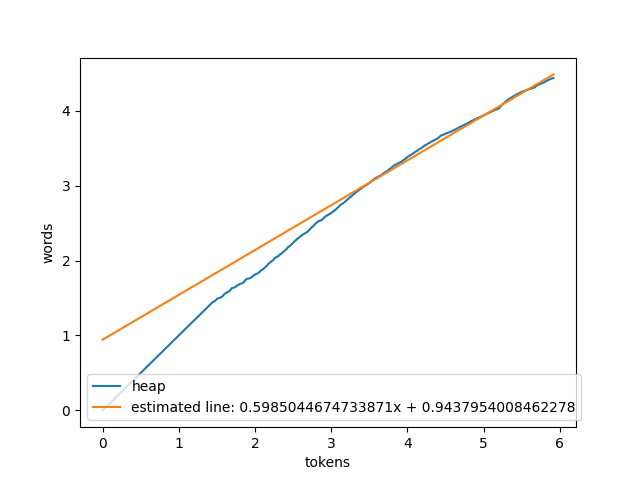

In [8]:
import matplotlib.pyplot as plt
import numpy as np

unique_tokens = 0
freq_dic = {} 
X = []
Y = []
for index, word in enumerate(tokens):
    if not word in freq_dic.keys():
        freq_dic[word] = 0
        unique_tokens += 1
        X.append(index + 1)
        Y.append(unique_tokens)
    freq_dic[word] += 1

x, y = np.log10(X), np.log10(Y)
plt.plot(x, y, label="heap")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, label="estimated line: {}x + {}".format(m, b))
plt.xlabel('tokens')
plt.ylabel('words')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


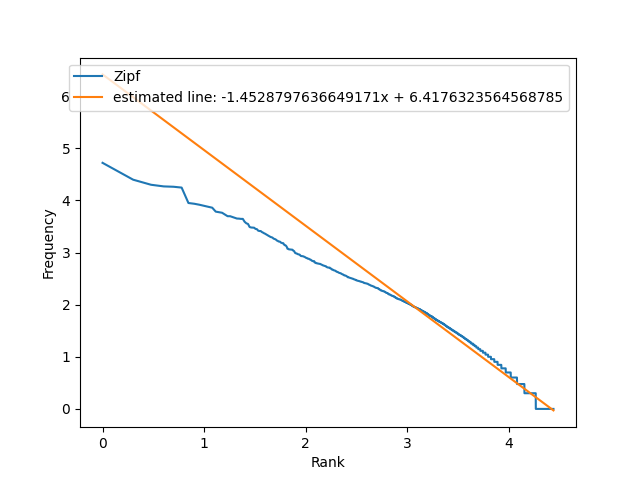

In [4]:
import matplotlib.pyplot as plt
import numpy as np

freq_dic = {}
for index, word in enumerate(tokens):
    if not word in freq_dic.keys():
        freq_dic[word] = 0
    freq_dic[word] += 1

token_num = len(freq_dic.keys()) 
X = [x+1 for x in range(token_num)]
Y = sorted(freq_dic.values())[::-1]

x, y = np.log10(X), np.log10(Y)
plt.plot(x, y, label="Zipf")

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, label="estimated line: {}x + {}".format(m, b))

plt.xlabel('Rank')
plt.ylabel('Frequency')

plt.legend()
plt.show()